<a href="https://colab.research.google.com/github/ts-potofgold/GA-DSI_project4/blob/master/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
!pip install pycaret

In [116]:
# points = cv2.findNonZero(thresholdImage)
# rect = cv2.minAreaRect(points)

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycaret
from pycaret.regression import *

In [119]:
s_all = pd.read_csv('/content/drive/MyDrive/datasets/All_Station_Data_20220222.csv')

In [120]:
s_all.shape

(3933, 133)

In [121]:
s_all.head(3)

,SW Version,Serial Number,Station,Date,Time,SpendTime(s),Angle(deg),X Dis(um),Y Dis(um),Target X Pos(pixel),...,6 Axis Y.3,6 Axis Z.3,6 Axis R.3,6 Axis Tilt X.3,6 Axis Tilt Y.3,Robot Current Tool.3,Robot Axis X.3,Robot Axis Y.3,Robot Axis Z.3,Robot Angle.3
0,1.0.0.15b,011L43012200001,A-s101,11/1/2021,12:05:53,0.0,-89.83,5.432888,2.020753,2734.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0.0.15b,011L43012200001,A-s102,11/1/2021,12:31:30,8.6,-89.76,25.579270,1.875559,2731.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0.0.15b,011L43012200001,A-s102,11/1/2021,12:32:25,0.0,-89.76,25.579270,1.875559,2731.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# regress = setup(data = s_all, target = 'LB2-Cy')

Check for duplicates

In [123]:
s_all[s_all['Serial Number'].duplicated()]

,SW Version,Serial Number,Station,Date,Time,SpendTime(s),Angle(deg),X Dis(um),Y Dis(um),Target X Pos(pixel),...,6 Axis Y.3,6 Axis Z.3,6 Axis R.3,6 Axis Tilt X.3,6 Axis Tilt Y.3,Robot Current Tool.3,Robot Axis X.3,Robot Axis Y.3,Robot Axis Z.3,Robot Angle.3
1,1.0.0.15b,011L43012200001,A-s102,11/1/2021,12:31:30,8.60,-89.76,25.579270,1.875559,2731.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0.0.15b,011L43012200001,A-s102,11/1/2021,12:32:25,0.00,-89.76,25.579270,1.875559,2731.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0.0.15b,011L43012200001,A-s201,11/1/2021,16:44:20,6241.51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0.0.15b,011L43012200001,A-s202,11/1/2021,16:45:28,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0.0.15b,011L43012200002,A-s102,11/1/2021,17:30:21,190.53,0.08,2.674053,1.778665,2723.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,1.0.22.00,PaulTest00001,A-s202,21/2/2022,18:43:24,4.10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3929,1.0.22.1,PaulTest00001,A-s201,21/2/2022,18:54:22,194.83,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3930,1.0.22.1,PaulTest00001,A-s202,21/2/2022,18:55:27,19.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3931,1.0.22.1,PaulTest00001,A-s201,21/2/2022,19:04:23,308.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
s_all.columns = s_all.columns.str.lower()

In [125]:
s_all['station'].unique()

array(['A-s101', 'A-s102', 'A-s201', 'A-s202', 'A-s901', 'A-s701',
       'A-s702', 'A-s703', 'A-s704', 'A-s705', 'A-s706', 'A-s902',
       'A-s903', 'A-s103', 'A-s203'], dtype=object)

In [126]:
s11 = s_all[(s_all['station'].str.contains('A-s101'))]

In [127]:
s12 = s_all[(s_all['station'].str.contains('A-s102'))]

In [128]:
s21 = s_all[(s_all['station'].str.contains('A-s201'))]

In [129]:
s22 = s_all[(s_all['station'].str.contains('A-s202'))]

#### S7

In [130]:
s71 = s_all[(s_all['station'].str.contains('A-s701'))]

In [131]:
s72 = s_all[(s_all['station'].str.contains('A-s702'))]

In [132]:
s91 = s_all[(s_all['station'].str.contains('A-s901'))]

In [133]:
s92 = s_all[(s_all['station'].str.contains('A-s902'))]

In [134]:
def clean_s1(df):
    df_null = pd.DataFrame(df.isnull().sum(), columns=['isnull'])
    st_df = df[(df['spendtime(s)'] < 500) & (df['spendtime(s)'] > 2)]
    st_df = st_df.drop(columns=['sw version'])
    st_df.insert(3, 'datetime', st_df['date'] + ' ' + st_df['time'])
    st_df = st_df.drop(columns=['date', 'time'])
    st_df['datetime'] = st_df['datetime'].astype('datetime64')
    st_df = st_df[st_df['serial number'].str.len() == 15]
    st_df = st_df[(st_df['angle(deg)'] < 10) & (st_df['angle(deg)'] > -10)]
    return st_df

In [135]:
def clean_s2(df):
    df_null = pd.DataFrame(df.isnull().sum(), columns=['isnull'])
    st_df = df[(df['spendtime(s)'] < 2000) & (df['spendtime(s)'] > 2)]
    st_df = st_df.drop(columns=['sw version'])
    st_df.insert(3, 'datetime', st_df['date'] + ' ' + st_df['time'])
    st_df = st_df.drop(columns=['date', 'time'])
    st_df['datetime'] = st_df['datetime'].astype('datetime64')
    st_df = st_df[st_df['serial number'].str.len() == 15]
    return st_df

In [136]:
def clean_s7(df):
    df_null = pd.DataFrame(df.isnull().sum(), columns=['isnull'])
    st_df = df[(df['spendtime(s)'] < 2000) & (df['spendtime(s)'] > 2)]
    st_df = st_df.drop(columns=['sw version'])
    st_df.insert(3, 'datetime', st_df['date'] + ' ' + st_df['time'])
    st_df = st_df.drop(columns=['date', 'time'])
    st_df['datetime'] = st_df['datetime'].astype('datetime64')
    st_df = st_df[st_df['serial number'].str.len() == 15]
    return st_df

In [137]:
def clean_s9(df):
    df_null = pd.DataFrame(df.isnull().sum(), columns=['isnull'])
    st_df = df[(df['spendtime(s)'] < 2000) & (df['spendtime(s)'] > 2)]
    st_df = st_df.drop(columns=['sw version'])
    st_df.insert(3, 'datetime', st_df['date'] + ' ' + st_df['time'])
    st_df = st_df.drop(columns=['date', 'time'])
    st_df['datetime'] = st_df['datetime'].astype('datetime64')
    st_df = st_df[st_df['serial number'].str.len() == 15]
    return st_df

#### S11

In [138]:
clean_s11 = clean_s1(s11)

In [139]:
clean_s11['angle(deg)'].describe()

count    209.000000
mean       0.674976
std        0.245075
min        0.000000
25%        0.550000
50%        0.700000
75%        0.800000
max        1.470000
Name: angle(deg), dtype: float64

In [140]:
clean_s11.head(3)

,serial number,station,datetime,spendtime(s),angle(deg),x dis(um),y dis(um),target x pos(pixel),target y pos(pixel),threshold(a),...,6 axis y.3,6 axis z.3,6 axis r.3,6 axis tilt x.3,6 axis tilt y.3,robot current tool.3,robot axis x.3,robot axis y.3,robot axis z.3,robot angle.3
10,011L43012200003,A-s101,2021-01-13 12:29:14,219.79,0.23,6.304053,1.125365,2724.21,1825.53,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,011L43012200004,A-s101,2021-01-13 13:55:37,270.55,0.15,6.291941,0.556553,2722.18,1826.52,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,011L43012200005,A-s101,2021-01-13 16:02:07,499.84,0.83,0.375171,0.859053,2721.21,1820.53,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### S12

In [141]:
clean_s12 = clean_s1(s12)

In [142]:
clean_s12['angle(deg)'].describe()

count    246.000000
mean       0.666911
std        0.256511
min        0.000000
25%        0.542500
50%        0.690000
75%        0.807500
max        1.440000
Name: angle(deg), dtype: float64

In [143]:
clean_s12.head(3)

,serial number,station,datetime,spendtime(s),angle(deg),x dis(um),y dis(um),target x pos(pixel),target y pos(pixel),threshold(a),...,6 axis y.3,6 axis z.3,6 axis r.3,6 axis tilt x.3,6 axis tilt y.3,robot current tool.3,robot axis x.3,robot axis y.3,robot axis z.3,robot angle.3
6,011L43012200002,A-s102,2021-11-01 17:30:21,190.53,0.08,2.674053,1.778665,2723.21,1814.53,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,011L43012200003,A-s102,2021-01-13 12:32:36,24.51,0.25,5.445000,0.048447,2724.21,1825.53,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,011L43012200004,A-s102,2021-01-13 13:58:28,168.21,0.08,2.008494,0.580776,2722.18,1826.52,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### S21

In [144]:
clean_s21 = clean_s2(s21)

In [145]:
clean_s21.head(3)

,serial number,station,datetime,spendtime(s),angle(deg),x dis(um),y dis(um),target x pos(pixel),target y pos(pixel),threshold(a),...,6 axis y.3,6 axis z.3,6 axis r.3,6 axis tilt x.3,6 axis tilt y.3,robot current tool.3,robot axis x.3,robot axis y.3,robot axis z.3,robot angle.3
7,011L43012200002,A-s201,2021-11-01 18:09:16,353.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,011L43012200003,A-s201,2021-01-13 13:17:46,1224.79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,011L43012200005,A-s201,2021-01-14 13:02:33,624.22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### S22

In [146]:
clean_s22 = clean_s2(s22)

#### S71

In [147]:
clean_s71 = clean_s7(s71)

#### S72

In [148]:
clean_s72 = clean_s7(s72)

#### S91

In [149]:
clean_s91 = clean_s9(s91)

#### S92

In [150]:
clean_s92 = clean_s9(s92)

Append S1,2,7,9

In [151]:
all_append = pd.DataFrame().append([clean_s11, clean_s12, clean_s21, clean_s22, clean_s71, clean_s72, clean_s91, clean_s92])

In [152]:
all_append.tail(3)

,serial number,station,datetime,spendtime(s),angle(deg),x dis(um),y dis(um),target x pos(pixel),target y pos(pixel),threshold(a),...,6 axis y.3,6 axis z.3,6 axis r.3,6 axis tilt x.3,6 axis tilt y.3,robot current tool.3,robot axis x.3,robot axis y.3,robot axis z.3,robot angle.3
3824,011L71511210041,A-s902,2022-02-16 21:22:19,42.19,NaN,NaN,NaN,NaN,NaN,NaN,...,199464.0,-83249.0,86683.0,11015.0,4259.0,3.0,390178.0,56261.0,-31448.0,-90000.0
3828,011L71511210040,A-s902,2022-02-16 21:31:22,13.48,NaN,NaN,NaN,NaN,NaN,NaN,...,199500.0,565.0,209998.0,11018.0,4259.0,3.0,390178.0,56260.0,-31448.0,-90000.0
3840,011L71511210048,A-s902,2022-02-17 13:24:59,10.87,NaN,NaN,NaN,NaN,NaN,NaN,...,199280.0,-82945.0,144010.0,11024.0,4259.0,2.0,-324466.0,217141.0,0.0,-90001.0


Data Distribution

In [153]:
col_list = all_append.columns.to_list()

In [154]:
data = pd.DataFrame(all_append.dtypes, columns=['dtypes'])

In [155]:
data.head(5)

,dtypes
serial number,object
station,object
datetime,datetime64[ns]
spendtime(s),float64
angle(deg),float64


In [156]:
data.to_csv('./dtypes.csv')

Final pointing Slow Axis, data distribution

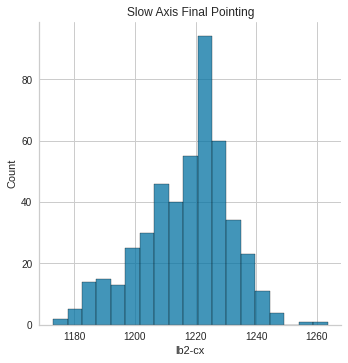

In [157]:
sns.displot(all_append['lb2-cx']).set(title='Slow Axis Final Pointing');

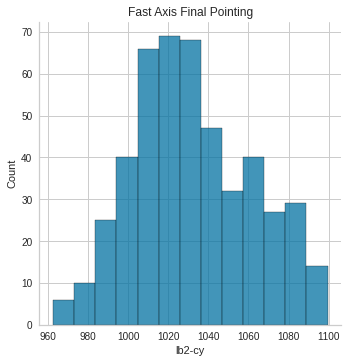

In [158]:
sns.displot(all_append['lb2-cy']).set(title='Fast Axis Final Pointing');

In [162]:
all_append['station'].unique()

array(['A-s101', 'A-s102', 'A-s201', 'A-s202', 'A-s701', 'A-s702',
       'A-s901', 'A-s902'], dtype=object)

Both SA and FA has a normal distribution

Attempt to merge by serial number

In [183]:
s1_drop = all_append[all_append['station'].str.contains('A-s1')].dropna(how='all', axis=1)

In [184]:
s2_drop = all_append[all_append['station'].str.contains('A-s2')].dropna(how='all', axis=1)

In [188]:
set.intersection(set(s1_drop.columns), set(s2_drop.columns))

{'datetime', 'serial number', 'spendtime(s)', 'station'}

### Spendtime has no significant relationship hence will be dropped

In [193]:
s1_drop = s1_drop.drop(columns=['spendtime(s)'])

In [194]:
s2_drop = s2_drop.drop(columns='spendtime(s)')

In [195]:
set.intersection(set(s1_drop.columns), set(s2_drop.columns))

{'datetime', 'serial number', 'station'}

### Merge S1 and S2

In [199]:
s12_merge = s1_drop.merge(s2_drop, how='inner', left_on=['serial number'], right_on=['serial number'])

In [200]:
s12_merge.isna().sum()

serial number            0
station_x                0
datetime_x               0
angle(deg)               0
x dis(um)                0
y dis(um)                0
target x pos(pixel)      0
target y pos(pixel)      0
threshold(a)             0
marker offset(x)         0
pinhole angle            0
pinhole height           0
pinhole width            0
3 axis x                 2
3 axis y                 2
3 axis z                 2
6 axis x                 2
6 axis y                 2
6 axis z                 2
6 axis r                 2
6 axis tilt x            2
6 axis tilt y            2
robot current tool       2
robot axis x             2
robot axis y             2
robot axis z             2
robot angle              2
station_y                0
datetime_y               0
angle(deg).1             0
x dis(um).1              0
y dis(um).1              0
target x pos(pixel).1    0
target y pos(pixel).1    0
threshold(a).1           0
marker offset(x).1       0
pinhole angle.1          0
p

## S7 and S9

In [203]:
s7_drop = all_append[all_append['station'].str.contains('A-s7')].dropna(how='all', axis=1)

In [204]:
s9_drop = all_append[all_append['station'].str.contains('A-s9')].dropna(how='all', axis=1)

In [205]:
set.intersection(set(s7_drop.columns), set(s9_drop.columns))

{'datetime', 'serial number', 'spendtime(s)', 'station'}

In [160]:
regress = setup(data = all_append, target = 'lb2-cy')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:55:26
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
serial number,Categorical
station,Categorical
datetime,Date
spendtime(s),Numeric
angle(deg),Numeric
...,...
robot axis x.3,Numeric
robot axis y.3,Numeric
robot axis z.3,Categorical
robot angle.3,Numeric


ValueError: ignored